In [5]:
!pip install pandas



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\sande\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = "house_price.csv"
data = pd.read_csv(filepath)

In [3]:
X = data["house_size"].values
y = data["price"].values


In [4]:
def lwr(x_query, X, y, tau):
    m = len(X)
    weights = np.exp(-((X - x_query) ** 2) / (2 * tau ** 2))
    X_b = np.c_[np.ones(m), X]
    W = np.diag(weights)
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y)
    x_query_b = np.array([1, x_query])
    return x_query_b @ theta


In [5]:
tau = 300 
x_query = 1600
predicted_tip = lwr(x_query, X, y, tau)
print(f"Predicted Price for 1600 sq.ft: {predicted_tip:.2f}")

Predicted Price for 1600 sq.ft: 222.87


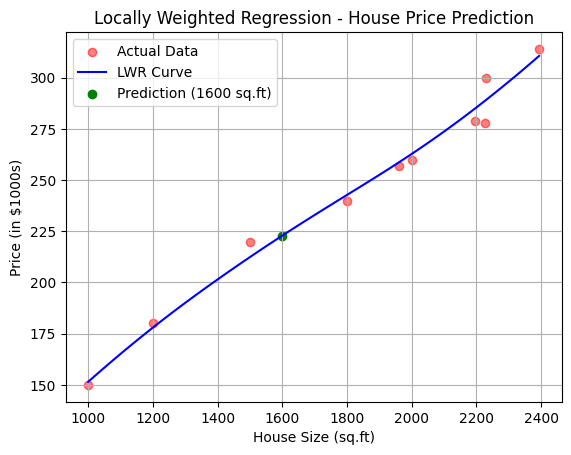

In [7]:
X_range = np.linspace(X.min(), X.max(), 100)
y_pred = np.array([lwr(x, X, y, tau) for x in X_range])

plt.scatter(X, y, color='red', alpha=0.5, label="Actual Data")
plt.plot(X_range, y_pred, color='blue', label="LWR Curve")
plt.scatter([x_query], [predicted_tip], color='green', marker='o', label="Prediction (1600 sq.ft)")

plt.xlabel("House Size (sq.ft)")
plt.ylabel("Price (in $1000s)")
plt.title("Locally Weighted Regression - House Price Prediction")
plt.legend()
plt.grid(True)
plt.show()
